In [3]:
import torch
import torch.nn as nn

from models.wta_cnp import WTA_CNP

from matplotlib import pyplot as plt

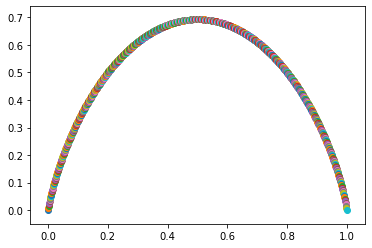

In [18]:
interval = 1000

x0 = torch.linspace(0, 1, interval)
x1 = torch.linspace(1, 0, interval)


for i in range(interval):
    plt.scatter(x0[i], torch.distributions.Categorical(torch.tensor([x0[i], x1[i]])).entropy())

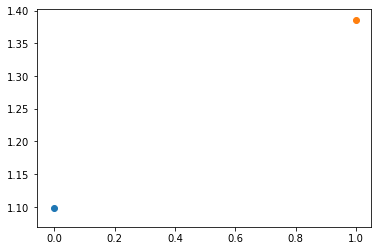

In [22]:

# for i in range(1000):
#     x0, x1, x2, x3 = torch.rand(1), torch.rand(1), torch.rand(1), torch.rand(1)
#     x0, x1, x2, x3 = x0, x1, x2, x3 / (x0 + x1 + x2 + x3)

#     plt.scatter(float(i)/2000, torch.distributions.Categorical(torch.tensor([x0, x1, x2, x3])).entropy())

plt.scatter(0, torch.distributions.Categorical(torch.tensor([0.33, 0.33, 0.34, 0])).entropy())
plt.scatter(1, torch.distributions.Categorical(torch.tensor([0.25, 0.25, 0.25, 0.25])).entropy())

In [9]:
from tqdm import tqdm

min_ent = 10000
min_test = None


for i in tqdm(range(10_000_000)):
    test = torch.rand((4))
    sum = test.sum()
    test = test / sum
    
    ent = torch.distributions.Categorical(test).entropy()
    if ent < min_ent:
        min_ent = ent
        min_test = test

print(min_ent)
print(min_test)

100%|██████████| 10000000/10000000 [10:53<00:00, 15291.62it/s]

tensor(0.0196)
tensor([1.0398e-05, 9.9741e-01, 6.8965e-04, 1.8942e-03])


In [2]:
model = WTA_CNP(1, 1, 10, 10, [256, 256, 256], num_decoders=2, decoder_hidden_dims=[128, 128], batch_size=1)

optimizer_wta = torch.optim.Adam(lr=1e-4, params=model.parameters())

In [13]:
o = torch.rand(1,5,2)
t = torch.rand(1,3,1)

optimizer_wta.zero_grad()
p,g = model(o,t)
l, n = model.loss(p,g,t)
l.backward()

optimizer_wta.step()


tensor([[[ 0.0677, -0.0468,  0.0210,  ...,  0.0356,  0.0416, -0.0292],
         [ 0.0667,  0.0714,  0.0612,  ...,  0.1168,  0.0055, -0.0330],
         [ 0.0917, -0.0167,  0.0386,  ...,  0.0267,  0.0123, -0.0341],
         [ 0.1197,  0.0088,  0.0888,  ...,  0.0967, -0.0128,  0.0088],
         [ 0.1003,  0.0129,  0.0799,  ...,  0.0950, -0.0102, -0.0051]]],
       grad_fn=<ViewBackward0>)
tensor(0.9446, grad_fn=<MeanBackward0>) tensor(0.2476, grad_fn=<MeanBackward0>) tensor([0.6883], grad_fn=<NegBackward0>) tensor(0.0693, grad_fn=<StdBackward0>)
